# Multilinear & Polynomial Regression Lab

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

print("Name: Mohamed Aashik S \nRoll No: 24BAD072\n")

Name: Mohamed Aashik S 
Roll No: 24BAD072



## Part 1: Multi-Linear Regression (Student Performance)

In [ ]:
df = pd.read_csv("Fill the path with StudentsPerformance.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Mohamed Aashik\AppData\Local\Temp\ipykernel_24608\3674426179.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:\\Users\\Mohamed Aashik\\OneDrive - Kumaraguru College of Technology\\Assignment\\ML\\ML Repo\\EX 3 - Multi Linear and Polynomial regression\Dataset\\StudentsPerformance.csv")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
df['final_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

In [ ]:
le = LabelEncoder()
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

In [ ]:
X = df[['parental level of education', 'test preparation course', 'math score']] # Example subset
y = df['final_score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 30.31
RMSE: 5.51
R² Score: 0.86


In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


Text(0.5, 1.0, 'Predicted vs Actual')

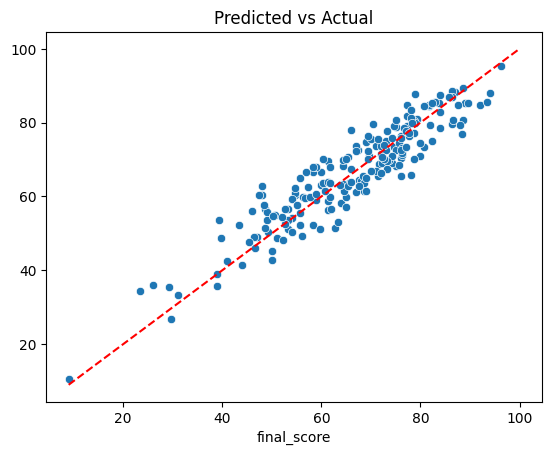

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.title('Predicted vs Actual')

Text(0.5, 1.0, 'Residual Distribution')

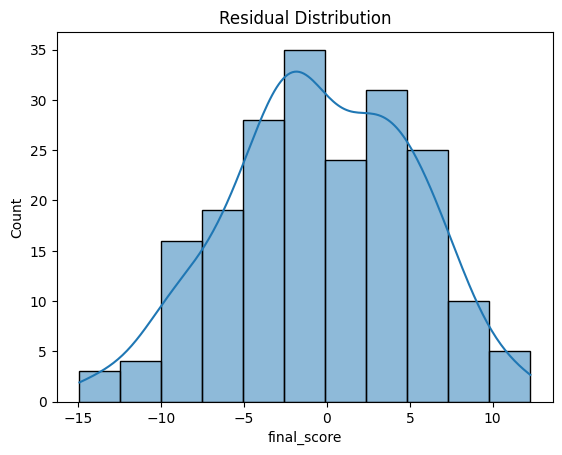

In [ ]:
sns.histplot((y_test - y_pred), kde=True)
plt.title('Residual Distribution')

Text(0.5, 1.0, 'Feature Influence')

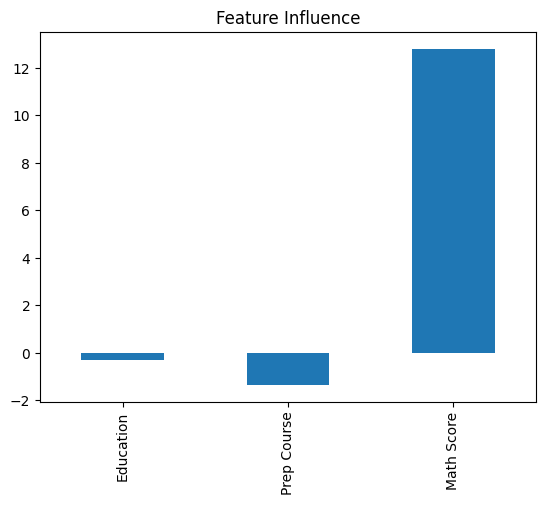

In [ ]:
coef_series = pd.Series(lr_model.coef_, index=['Education', 'Prep Course', 'Math Score'])
coef_series.plot(kind='bar')
plt.title('Feature Influence')

## Part 2: Polynomial Regression (Auto-MPG)

In [ ]:
df1 = pd.read_csv("Fill the path with auto-mpg.csv")
df1 = df1.replace("?", np.nan)
df1["horsepower"] = df1["horsepower"].astype(float)
df1 = df1.dropna()
print("Name: Mohamed Aashik S \nRoll No: 24BAD072\n")


Name: Mohamed Aashik S 
Roll No: 24BAD072



In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [9]:
df1.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [10]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [11]:
df1.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [12]:
X = df1[['horsepower']].values
y = df1['mpg'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
degrees = [1, 2, 3, 4]
results = {}

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    scaler = StandardScaler()
    X_poly_train = scaler.fit_transform(X_poly_train)
    X_poly_test = scaler.transform(X_poly_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    y_pred = model.predict(X_poly_test)
    mse = mean_squared_error(y_test, y_pred)
    results[d] = mse
print("Polynomial Degree vs MSE:")
for degree, mse in results.items():
    print(f"Degree {degree}: MSE = {mse:.2f}")      


Polynomial Degree vs MSE:
Degree 1: MSE = 22.15
Degree 2: MSE = 18.42
Degree 3: MSE = 18.46
Degree 4: MSE = 18.27


In [14]:
degrees = [1, 2, 3, 4]

print("=== Polynomial Regression with Multiple Features ===")
for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    scaler = StandardScaler()
    X_train_poly = scaler.fit_transform(X_train_poly)
    X_test_poly = scaler.transform(X_test_poly)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    pred = model.predict(X_test_poly)
    
    print(f"Degree {d}")
    print(f"MSE: {mean_squared_error(y_test, pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred)):.4f}")
    print(f"R2: {r2_score(y_test, pred):.4f}")
    print()

=== Polynomial Regression with Multiple Features ===
Degree 1
MSE: 22.1532
RMSE: 4.7067
R2: 0.5660

Degree 2
MSE: 18.4170
RMSE: 4.2915
R2: 0.6392

Degree 3
MSE: 18.4603
RMSE: 4.2965
R2: 0.6383

Degree 4
MSE: 18.2682
RMSE: 4.2741
R2: 0.6421



In [15]:
# Print the results stored in the dictionary
print("Model Performance by Degree")
for degree, metrics in results.items():
    print(f"Degree {degree}: MSE = {metrics:.4f}")

Model Performance by Degree
Degree 1: MSE = 22.1532
Degree 2: MSE = 18.4170
Degree 3: MSE = 18.4603
Degree 4: MSE = 18.2682


In [16]:
ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_poly_train, y_train)
y_ridge_pred = ridge_model.predict(X_poly_test)

print(f"Ridge R2 Score: {r2_score(y_test, y_ridge_pred):.4f}")

Ridge R2 Score: 0.6414


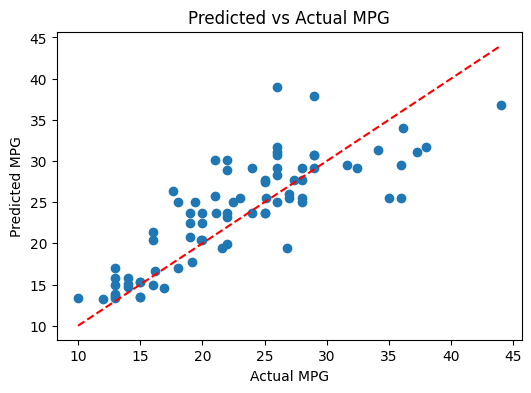

In [17]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Predicted vs Actual MPG")
plt.show()